# Домашнее задание №2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pd.options.display.max_columns = 999

In [2]:
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
import numpy as np

In [4]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Можно увидеть, что значения показателя производительности равно минимум 3 с минимальным разбросом. Это может говорить о неэффективном методе оценки персонала, особенно если к этому показателю привязывается награждение. 

In [5]:
df_hr['Gender'].replace(('Male', 'Female'), (1, 0), inplace=True)
df_hr['OverTime'].replace(('Yes', 'No'), (1, 0), inplace=True)
df_hr['Attrition'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [6]:
df_hr.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,-0.011716,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,-0.016547,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.022556,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.024037,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,NaN,0.022556,0.000508,1.000000,-0.000478,0.017960,-0.039403,0.033252,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,NaN,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,-0.000478,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.007782,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123


Значительная корреляция существует между переменными месячного дохода и уровня работы, причём такой связи между часовой ставкой нет. Можно предположить, что часовая ставка примерно равна между сотрудниками разных уровней, а зарплата в основном определяется премиями. Также уровень зарплаты положительно связан со стажем работы в компании. 

Также можно увидеть, что прирост зарплаты положительно связан с оценкой производительности. Из этой зависимости можно предположить, что в компании повышение зарплаты связано с производительностью, а также часть дохода сотрудники получают акциями компании.

Значительная связь существует между стажем работы в компании и сроком с прошлого повышения. 

Никаких других значимых корреляций в датасете нет

In [7]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [8]:
df_hr['Attrition'].sum()

237

Можно предположить, что переменная Attrition подразумевает под собой текучку, то есть показывает, какие сотрудники уже ушли из компании. Очистим данные от них.

In [9]:
df_hr = df_hr[df_hr['Attrition'] == 0]

## Анализ дохода

Учитывая, что среднее значение месячного заработка меньше месячной ставки, можно предположить, что общая зарплата вычисляется как сумма дохода (премии) и ставки (зарплаты)

In [10]:
df_hr['Salary'] = df_hr['MonthlyIncome']+df_hr['MonthlyRate']

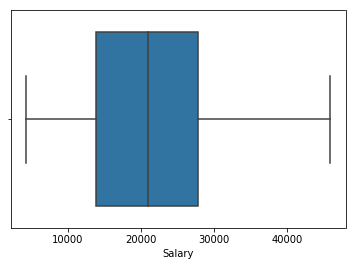

In [11]:
sns.boxplot(x=df_hr["Salary"])

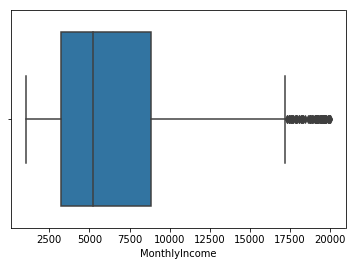

In [12]:
sns.boxplot(x=df_hr["MonthlyIncome"])

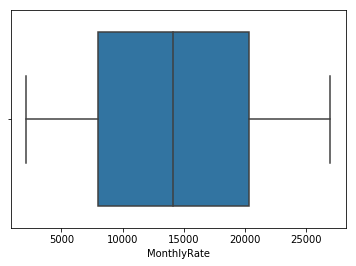

In [13]:
sns.boxplot(x=df_hr["MonthlyRate"])

Text(0,0.5,'Amount of employees')

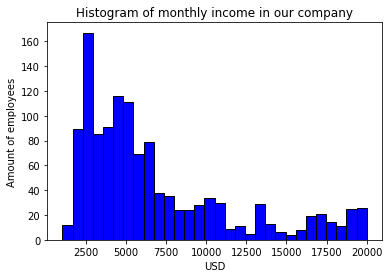

In [14]:
plt.hist(df_hr['MonthlyIncome'], color = 'blue', edgecolor = 'black',
         bins = 30)

# Add labels
plt.title('Histogram of monthly income in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

Text(0,0.5,'Amount of employees')

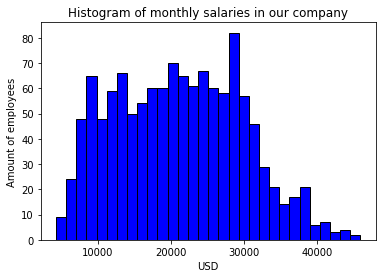

In [15]:
plt.hist(df_hr['Salary'], color = 'blue', edgecolor = 'black',
         bins = 30)

# Add labels
plt.title('Histogram of monthly salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

Text(0,0.5,'Amount of employees')

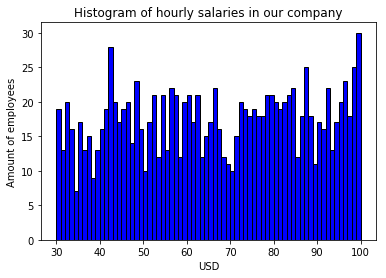

In [16]:
plt.hist(df_hr['HourlyRate'], color = 'blue', edgecolor = 'black', bins = 70)
# Add labels
plt.title('Histogram of hourly salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

Можно увидеть, что распределение зарплаты не включает в себя выбросы и выглядит нормально. Распределение месячной ставки довольно равномерно и не подвержено смещению. Однако распределение месячного дохода смещено вправо и включает многие выбросы.

In [17]:
df_hr['anomally_sal'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.mean(df_hr.MonthlyIncome) + 3*np.std(df_hr.MonthlyIncome),                 
                            1, 0)
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary,anomally_sal


Эти выбросы не выходят за пределы 3 стандартных отклонений.

In [18]:
df_hr['anomally_sal'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.mean(df_hr.MonthlyIncome) + 2.6*np.std(df_hr.MonthlyIncome),                 
                            1, 0)
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary,anomally_sal
123,51,0,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,162,1,1,51,3,5,Research Director,3,Single,19537,6462,7,Y,0,13,3,3,80,0,23,5,3,20,18,15,15,25999,1
165,50,0,Travel_Rarely,1452,Research & Development,11,3,Life Sciences,1,226,3,0,53,3,5,Manager,2,Single,19926,17053,3,Y,0,15,3,2,80,0,21,5,3,5,4,4,4,36979,1
190,52,0,Travel_Rarely,699,Research & Development,1,4,Life Sciences,1,259,3,1,65,2,5,Manager,3,Married,19999,5678,0,Y,0,14,3,1,80,1,34,5,3,33,18,11,9,25677,1
233,50,0,Travel_Rarely,854,Sales,1,4,Medical,1,323,4,0,68,3,5,Manager,4,Divorced,19517,24118,3,Y,0,11,3,3,80,1,32,3,2,7,0,0,6,43635,1
257,40,0,Travel_Rarely,1416,Research & Development,2,2,Medical,1,352,1,1,49,3,5,Research Director,3,Divorced,19436,5949,0,Y,0,19,3,4,80,1,22,5,3,21,7,3,9,25385,1
392,54,0,Travel_Rarely,821,Research & Development,5,2,Medical,1,522,1,1,86,3,5,Research Director,1,Married,19406,8509,4,Y,0,11,3,3,80,1,24,4,2,4,2,1,2,27915,1
411,60,0,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,549,1,0,41,3,5,Manager,1,Married,19566,3854,5,Y,0,11,3,4,80,0,33,5,1,29,8,11,10,23420,1
473,49,0,Travel_Rarely,1245,Research & Development,18,4,Life Sciences,1,638,4,1,58,2,5,Research Director,3,Divorced,19502,2125,1,Y,1,17,3,3,80,1,31,5,3,31,9,0,9,21627,1
497,44,0,Travel_Rarely,1315,Research & Development,3,4,Other,1,671,4,1,35,3,5,Manager,4,Married,19513,9358,4,Y,1,12,3,1,80,1,26,2,4,2,2,0,1,28871,1
716,41,0,Travel_Frequently,840,Research & Development,9,3,Medical,1,999,1,1,64,3,5,Research Director,3,Divorced,19419,3735,2,Y,0,17,3,2,80,1,21,2,4,18,16,0,11,23154,1


In [19]:
df_hr['anomally_sal'] = np.where(
                            df_hr['Salary'] > 
                            np.mean(df_hr.Salary) + 2.6*np.std(df_hr.Salary),                 
                            1, 0)
df_anomally_sal = df_hr[df_hr['anomally_sal'] == 1]

df_anomally_sal

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Salary,anomally_sal
290,49,0,Travel_Frequently,636,Research & Development,10,4,Life Sciences,1,396,3,0,35,3,5,Research Director,1,Single,18665,25594,9,Y,1,11,3,4,80,0,22,4,3,3,2,1,2,44259,1
954,42,0,Non-Travel,495,Research & Development,2,1,Life Sciences,1,1334,3,1,37,3,4,Manager,3,Married,17861,26582,0,Y,1,13,3,4,80,0,21,3,2,20,8,2,10,44443,1
1024,47,0,Travel_Rarely,359,Research & Development,2,4,Medical,1,1443,1,0,82,3,4,Research Director,3,Married,17169,26703,3,Y,0,19,3,2,80,2,26,2,4,20,17,5,6,43872,1
1129,42,0,Travel_Rarely,1059,Research & Development,9,2,Other,1,1595,4,1,93,2,5,Manager,4,Single,19613,26362,8,Y,0,22,4,4,80,0,24,2,3,1,0,0,1,45975,1
1401,55,0,Travel_Rarely,189,Human Resources,26,4,Human Resources,1,1973,3,1,71,4,5,Manager,2,Married,19636,25811,4,Y,1,18,3,1,80,1,35,0,3,10,9,1,4,45447,1


Можно увидеть, что наибольшее значение месячного дохода и зарплату имеют в основном сотрудники R&D, при этом их показатель производительности в среднем равен трём.

## Доход по гендерам

In [20]:
df_hr_g1 = df_hr[df_hr['Gender'] == 1]
df_hr_g0 = df_hr[df_hr['Gender'] == 0]

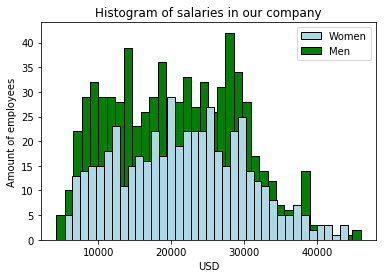

In [21]:
plt.hist(df_hr_g1['Salary'], color = 'green', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g0['Salary'], color = 'lightblue', edgecolor = 'black',
         bins = int(180/5))

handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in ['lightblue', 'green']]
labels= ["Women","Men"]

# Add labels
plt.title('Histogram of salaries in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')
plt.legend(handles, labels)

Распределение зарплат примерно совпадает.

## Удовлетворённость


In [22]:
print("Average Environment Satisfaction score of employees is {:2.1f}, \
average Work-life Balance score is {:2.1f}, \
average Relationship Satisfaction Score is {:2.1f}, \
and Job Satisfaction Score is {:2.1f}".format(np.mean(df_hr.EnvironmentSatisfaction),
                                           np.mean(df_hr.WorkLifeBalance), 
                                         np.mean(df_hr.RelationshipSatisfaction),
                                        np.mean(df_hr.JobSatisfaction)))

Average Environment Satisfaction score of employees is 2.8, average Work-life Balance score is 2.8, average Relationship Satisfaction Score is 2.7, and Job Satisfaction Score is 2.8


Text(0,0.5,'Amount of employees')

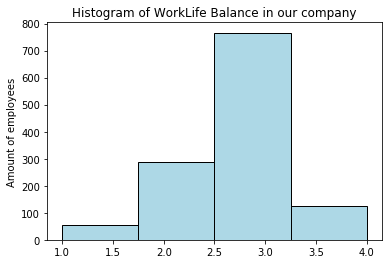

In [23]:
plt.hist(df_hr['WorkLifeBalance'], color = 'lightblue', edgecolor = 'black', bins = 4)
# Add labels
plt.title('Histogram of WorkLife Balance in our company')
plt.ylabel('Amount of employees')

Text(0,0.5,'Amount of employees')

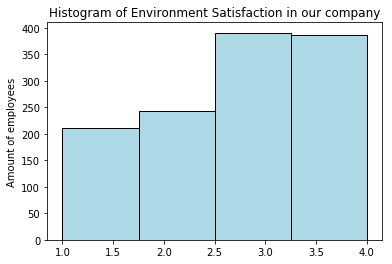

In [24]:
plt.hist(df_hr['EnvironmentSatisfaction'], color = 'lightblue', edgecolor = 'black', bins = 4)
# Add labels
plt.title('Histogram of Environment Satisfaction in our company')
plt.ylabel('Amount of employees')

Text(0,0.5,'Amount of employees')

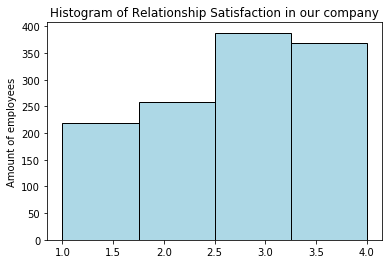

In [25]:
plt.hist(df_hr['RelationshipSatisfaction'], color = 'lightblue', edgecolor = 'black', bins = 4)
# Add labels
plt.title('Histogram of Relationship Satisfaction in our company')
plt.ylabel('Amount of employees')

Text(0,0.5,'Amount of employees')

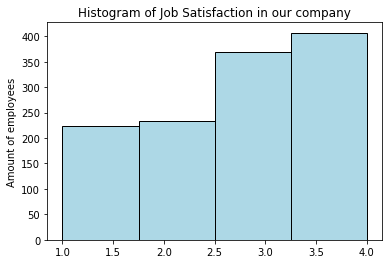

In [26]:
plt.hist(df_hr['JobSatisfaction'], color = 'lightblue', edgecolor = 'black', bins = 4)
# Add labels
plt.title('Histogram of Job Satisfaction in our company')
plt.ylabel('Amount of employees')

## Показатели производительности

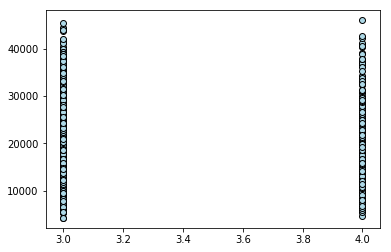

In [27]:
plt.scatter(df_hr['PerformanceRating'], df_hr['Salary'], color = 'lightblue', edgecolor = 'black')

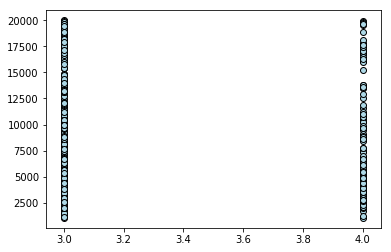

In [28]:
plt.scatter(df_hr['PerformanceRating'], df_hr['MonthlyIncome'], color = 'lightblue', edgecolor = 'black')

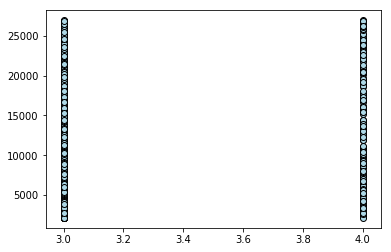

In [29]:
plt.scatter(df_hr['PerformanceRating'], df_hr['MonthlyRate'], color = 'lightblue', edgecolor = 'black')

Можно увидеть, что качество системы оценки производительности персонала очень слабое: во-первых, в неё входит только 2 показателя, а во-вторых, зарплата, доход или ставка так же никак не зависят от этого показателя.

# Выводы по набору данных

Набор содержит информацию о 1470 сотрудниках, 237 из которых уже покинули компанию. Исторические данные смешаны с фактическими данными о сотрудниках.

Зарплаты между гендерами распределены скорее всего равномерно, явных искажений не наблюдается.

Значения показателей удовлетворённость выше среднего, связи этих показателей друг с другом или с показателями производительности нет.

Систему оценки производительности необходимо пересмотреть, т.к. в ней отсутствует вариативность, то есть этот показатель не говорит ни о чём.

В компании в целом отсутствуют выбросы по доходу, однако существует тенденция к более высокой оплате труда менеджеров отдела R&D.